<a href="https://colab.research.google.com/github/sethkipsangmutuba/seth_Data-Scientist/blob/main/HOUSE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SEMI-ANALYSIS DASED ON M3 HOUSE WORTH.CSV

SETH KIPSANG

In [ ]:
# Importing the pandas library
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv("/content/M3_House_Worth.csv")

# Displaying the first few rows of the DataFrame
print(df.head())

   HousePrice  StoreArea  BasementArea   LawnArea HouseNetWorth
0      138800       29.9            75  11.223911           Low
1      155000       44.0           504   9.689869        Medium
2      152000       46.2           493  10.192613        Medium
3      160000       46.2           510   6.817316        Medium
4      226000       48.7           445  10.916215        Medium


In [ ]:
#Exploring the dataset

# Displaying information about the DataFrame
print(df.info())

# Displaying summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HousePrice     316 non-null    int64  
 1   StoreArea      316 non-null    float64
 2   BasementArea   316 non-null    int64  
 3   LawnArea       316 non-null    float64
 4   HouseNetWorth  316 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 12.5+ KB
None
          HousePrice   StoreArea  BasementArea    LawnArea
count     316.000000  316.000000    316.000000  316.000000
mean   213355.272152   48.312658    573.015823    9.913504
std    122491.768329   24.722463    564.160849    1.558365
min     39300.000000    1.800000      0.000000    6.213974
25%    115000.000000   27.000000      0.000000    9.211559
50%    173950.000000   47.600000    402.500000    9.922729
75%    294057.750000   67.300000   1107.000000   10.488359
max    755000.000000  122.000000   2188.000000  

The DataFrame consists of 316 entries and 5 columns. It includes house price, store area, basement area, lawn area, and house net worth. Data types range from integers to floats, except for house net worth, which is an object. Summary statistics reveal insights into the dataset's features.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the results
print("Missing Values:\n", missing_values)

Missing Values:
 HousePrice       0
StoreArea        0
BasementArea     0
LawnArea         0
HouseNetWorth    0
dtype: int64


No missing values

In [ ]:
# Check the data types of each column
data_types = df.dtypes

# Display the data types
print("Data Types:\n", data_types)

Data Types:
 HousePrice         int64
StoreArea        float64
BasementArea       int64
LawnArea         float64
HouseNetWorth     object
dtype: object


In [ ]:
# Get unique values in the HouseNetWorth column
unique_values = df['HouseNetWorth'].unique()

# Display the unique values
print("Unique Values in HouseNetWorth column:\n", unique_values)

Unique Values in HouseNetWorth column:
 ['Low' 'Medium' 'High']


In [ ]:
# Map categorical values to numerical equivalents
df['HouseNetWorth'] = df['HouseNetWorth'].map({'Not recorded': float('nan'), 'High': 3, 'Medium': 2, 'Low': 1})

# Convert the data type of HouseNetWorth column to float
df['HouseNetWorth'] = df['HouseNetWorth'].astype(float)

# Display the first few rows of the DataFrame to confirm the changes
print(df.head())

   HousePrice  StoreArea  BasementArea   LawnArea  HouseNetWorth
0      138800       29.9            75  11.223911            1.0
1      155000       44.0           504   9.689869            2.0
2      152000       46.2           493  10.192613            2.0
3      160000       46.2           510   6.817316            2.0
4      226000       48.7           445  10.916215            2.0


DATA PREPOCESSING AND CLEANING

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

HousePrice       0
StoreArea        0
BasementArea     0
LawnArea         0
HouseNetWorth    0
dtype: int64

In [ ]:
# Checking for duplicates
duplicates = df.duplicated()

# Displaying duplicates
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
311    False
312    False
313    False
314    False
315    False
Length: 316, dtype: bool


There are no duplicates in the DataFrame

In [ ]:
# Converting 'HouseNetWorth' column to numeric
df['HouseNetWorth'] = pd.to_numeric(df['HouseNetWorth'], errors='coerce')
df['HouseNetWorth']

0      1.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
311    1.0
312    3.0
313    1.0
314    3.0
315    1.0
Name: HouseNetWorth, Length: 316, dtype: float64

The values range from 1.0 to 3.0,  representing different  categories of net worth, with 1.0 being the lowest and 3.0 being the highest. Each value corresponds to a specific house low,medium and high in the dataset.

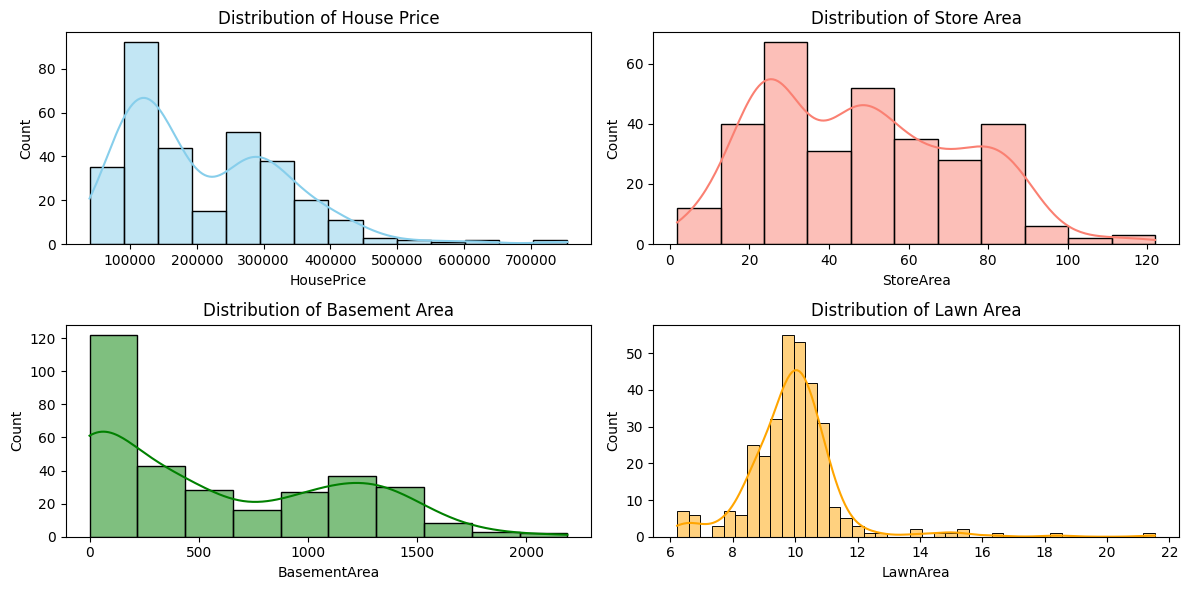

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['HousePrice'], kde=True, color='skyblue')
plt.title('Distribution of House Price')

plt.subplot(2, 2, 2)
sns.histplot(df['StoreArea'], kde=True, color='salmon')
plt.title('Distribution of Store Area')

plt.subplot(2, 2, 3)
sns.histplot(df['BasementArea'], kde=True, color='green')
plt.title('Distribution of Basement Area')

plt.subplot(2, 2, 4)
sns.histplot(df['LawnArea'], kde=True, color='orange')
plt.title('Distribution of Lawn Area')

plt.tight_layout()
plt.show()

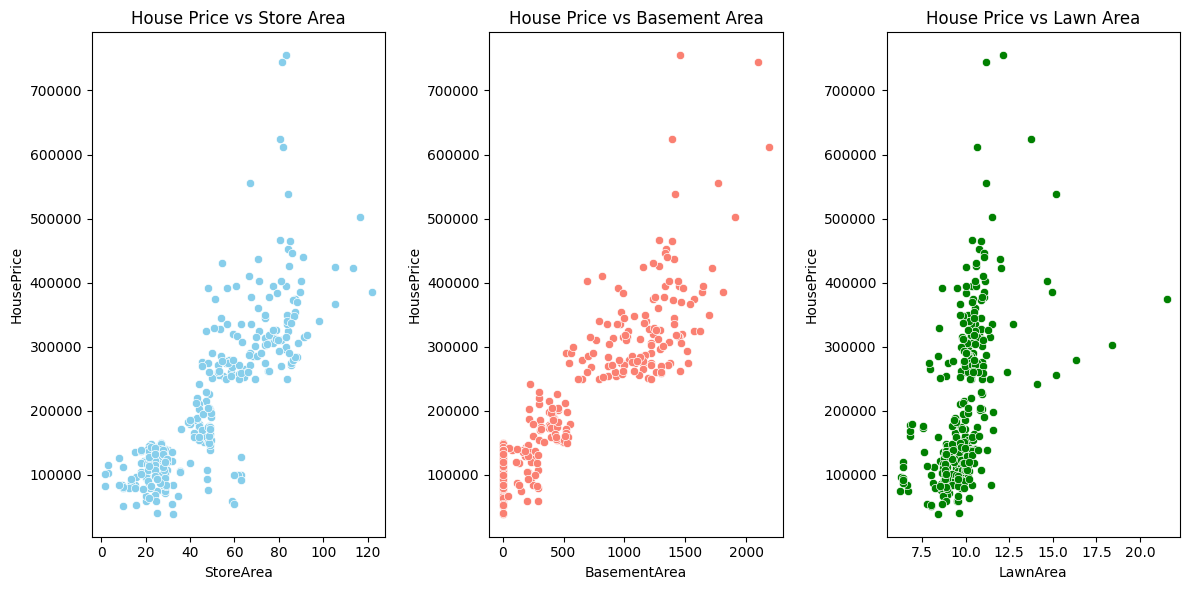

In [ ]:
# Scatter Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='StoreArea', y='HousePrice', data=df, color='skyblue')
plt.title('House Price vs Store Area')

plt.subplot(1, 3, 2)
sns.scatterplot(x='BasementArea', y='HousePrice', data=df, color='salmon')
plt.title('House Price vs Basement Area')

plt.subplot(1, 3, 3)
sns.scatterplot(x='LawnArea', y='HousePrice', data=df, color='green')
plt.title('House Price vs Lawn Area')

plt.tight_layout()
plt.show()

<ipython-input-23-90556f6a995c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HouseNetWorth', data=df, palette='muted')


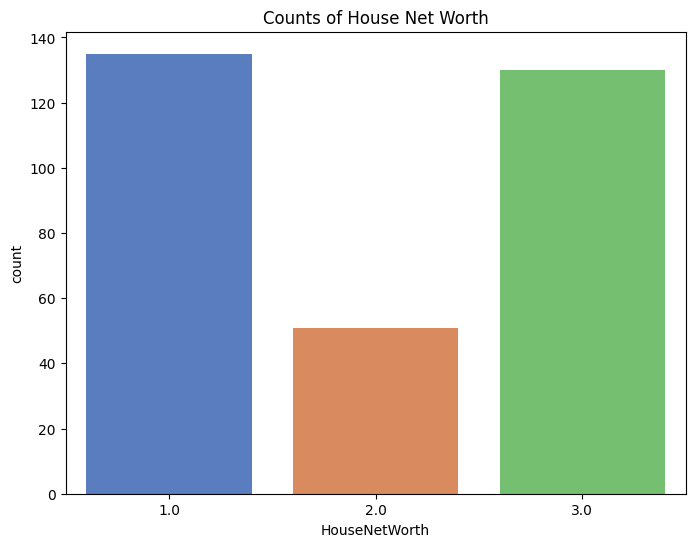

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseNetWorth', data=df, palette='muted')
plt.title('Counts of House Net Worth')
plt.show()

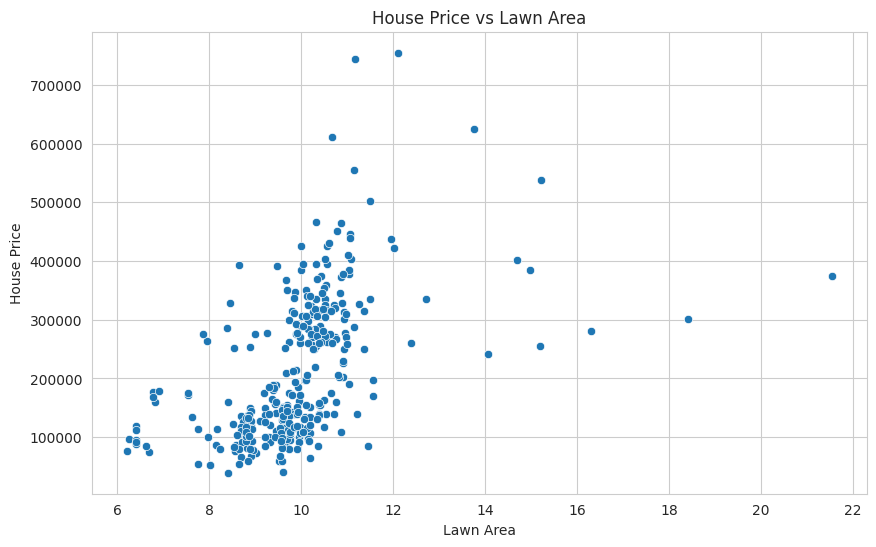

In [ ]:
# Scatter plot for HousePrice vs LawnArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LawnArea', y='HousePrice', data=df)
plt.title('House Price vs Lawn Area')
plt.xlabel('Lawn Area')
plt.ylabel('House Price')
plt.show()

<ipython-input-24-ec39baf2330a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HouseNetWorth', y='HousePrice', data=df, palette='pastel')


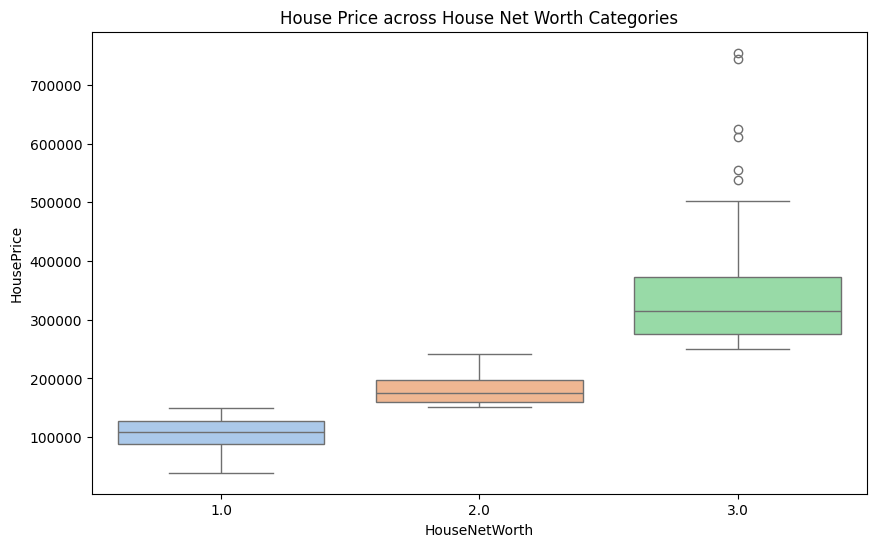

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseNetWorth', y='HousePrice', data=df, palette='pastel')
plt.title('House Price across House Net Worth Categories')
plt.show()

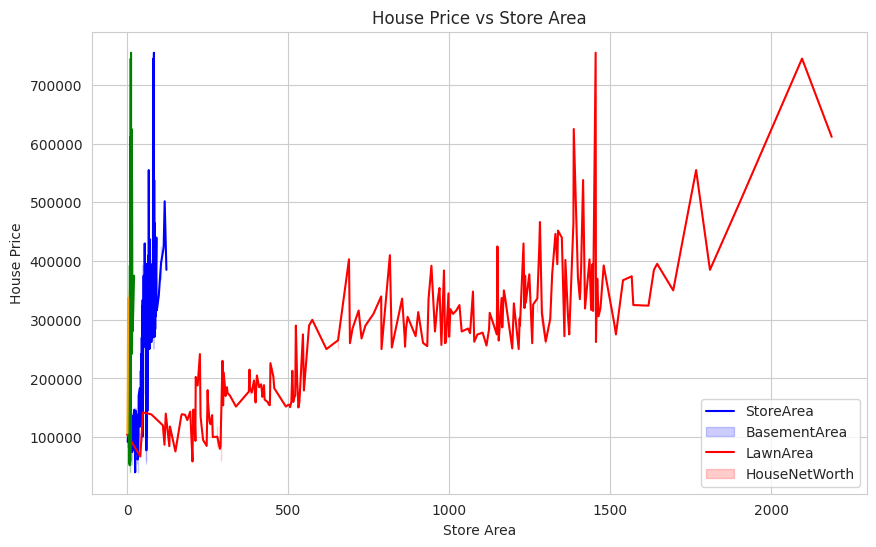

In [ ]:
# Line chart for HousePrice over StoreArea
plt.figure(figsize=(10, 6))
sns.lineplot(x='StoreArea', y='HousePrice', data=df, color='blue')
plt.title('House Price vs Store Area')
plt.xlabel('Store Area')
plt.ylabel('House Price')

# Line chart for HousePrice over BasementArea
sns.lineplot(x='BasementArea', y='HousePrice', data=df, color='red')

# Line chart for HousePrice over LawnArea
sns.lineplot(x='LawnArea', y='HousePrice', data=df, color='green')

# Line chart for HousePrice over HouseNetWorth
sns.lineplot(x='HouseNetWorth', y='HousePrice', data=df, color='orange')

plt.legend(['StoreArea', 'BasementArea', 'LawnArea', 'HouseNetWorth'])
plt.show()


<Figure size 1000x800 with 0 Axes>

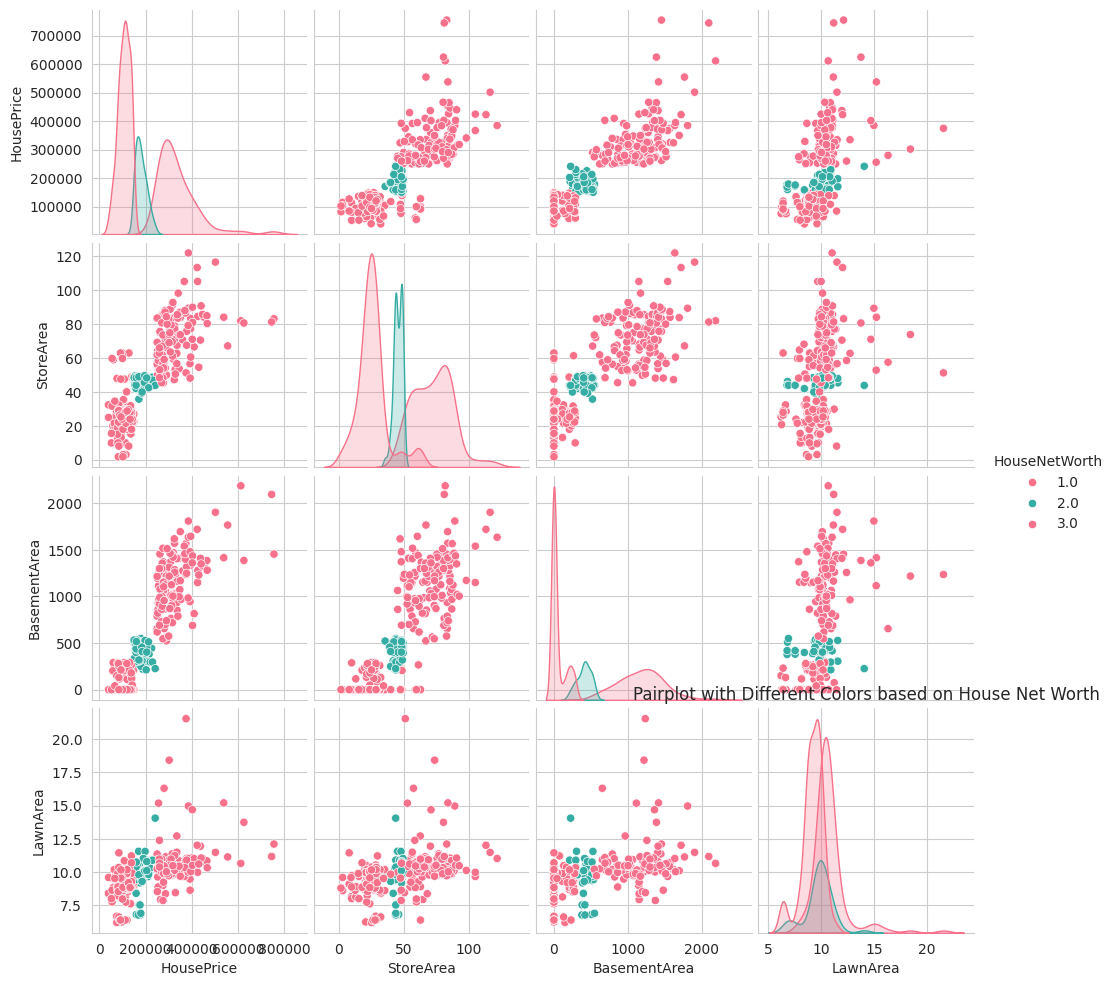

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# pairplot with hue
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="HouseNetWorth", palette="husl")
plt.title('Pairplot with Different Colors based on House Net Worth')
plt.show()
